In [1]:
from embeddings import convert_df_to_bert_embedding
import helpers
import pandas as pd
#tweet dataset: https://www.kaggle.com/datasets/kazanova/sentiment140/discussion/454347


2024-02-06 18:28:16.523341: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 18:28:16.547621: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 18:28:16.547663: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 18:28:16.547679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 18:28:16.552829: I tensorflow/core/platform/cpu_feature_g

In [13]:
df = helpers.pre_process_input_data('../../data/concept_net/tweets.csv',num_samples=12000)

<Axes: >

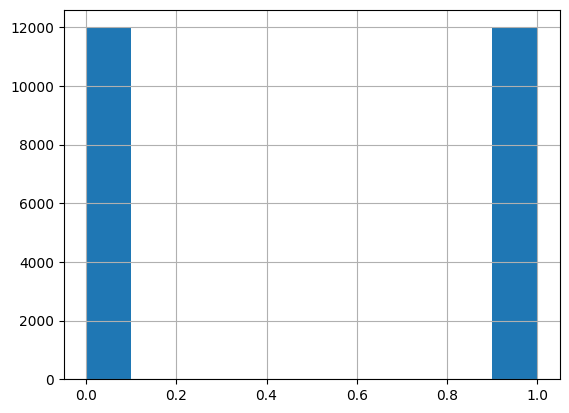

In [3]:
df['target'].hist()

In [4]:
bert_df = helpers.convert_df_to_bert_embedding(df)

Grabbing BERT Embeddings with padding to 231 characters


  0%|          | 0/48 [00:00<?, ?it/s]

2024-02-06 18:17:34.050100: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [5]:
bert_df

,target,text,features
505975,0,@kekagouvea light light liight *o* help me,"[-0.08834007382392883, 0.4778252840042114, 0.0..."
587233,0,Is not having a good day today.,"[-0.20414340496063232, 0.33307886123657227, -0..."
515413,0,@dafilfee Hurrah! I will need entertaining whi...,"[0.23600007593631744, 0.17454677820205688, 0.3..."
791961,0,@francbautista me too!,"[0.1689278483390808, 0.26162707805633545, 0.32..."
458833,0,"@PoisonGirl10 lmao, exactly!","[0.13237939774990082, -0.04904036596417427, 0...."
...,...,...,...
1532373,1,omg! my boss sneaked up on me twice already! l...,"[0.047840364277362823, 0.06062784418463707, 0...."
1012906,1,I have to take a rest bye all,"[0.2090277075767517, 0.29306164383888245, 0.10..."
1090168,1,back from Future,"[-0.1863425374031067, -0.06405772268772125, -0..."
973690,1,was surprised to read @diversionary was founde...,"[0.035727281123399734, -0.06467898190021515, 0..."


In [7]:
tmp = pd.DataFrame({
    'target':[0,1,1,1,0],
    'text':['hello','my','name','is','alex']
})

tmp

,target,text
0,0,hello
1,1,my
2,1,name
3,1,is
4,0,alex


In [8]:
tmp2 = convert_df_to_bert_embedding(tmp,text_col='text')

Grabbing BERT Embeddings with padding to 5 characters


  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
tmp2

,target,text,features
0,0,hello,"[-0.30609774589538574, 0.26222920417785645, -0..."
1,1,my,"[-0.1819387823343277, 0.21654148399829865, -0...."
2,1,name,"[-0.2511191666126251, 0.13067518174648285, -0...."
3,1,is,"[-0.2978282570838928, -0.00364714115858078, 0...."
4,0,alex,"[-0.26481226086616516, 0.08211399614810944, -0..."


In [2]:
embeddings = helpers.load_embeddings('../../data/concept_net/glove.840B.300d.txt')

0it [00:00, ?it/s]

In [3]:
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
",",-0.082752,0.672040,-0.14987,-0.064983,0.056491,0.402280,0.002775,-0.331100,-0.306910,2.0817,...,-0.14331,0.018267,-0.18643,0.207090,-0.355980,0.053380,-0.050821,-0.191800,-0.378460,-0.06589
.,0.012001,0.207510,-0.12578,-0.593250,0.125250,0.159750,0.137480,-0.331570,-0.136940,1.7893,...,0.16165,-0.066737,-0.29556,0.022612,-0.281350,0.063500,0.140190,0.138710,-0.360490,-0.03500
the,0.272040,-0.062030,-0.18840,0.023225,-0.018158,0.006719,-0.138770,0.177080,0.177090,2.5882,...,-0.42810,0.168990,0.22511,-0.285570,-0.102800,-0.018168,0.114070,0.130150,-0.183170,0.13230
and,-0.185670,0.066008,-0.25209,-0.117250,0.265130,0.064908,0.122910,-0.093979,0.024321,2.4926,...,-0.59396,-0.097729,0.20072,0.170550,-0.004736,-0.039709,0.324980,-0.023452,0.123020,0.33120
to,0.319240,0.063160,-0.27858,0.261200,0.079248,-0.214620,-0.104950,0.154950,-0.033530,2.4834,...,-0.12977,0.371300,0.18888,-0.004274,-0.106450,-0.258100,-0.044629,0.082745,0.097801,0.25045


In [4]:
embeddings.loc['the']

0      0.272040
1     -0.062030
2     -0.188400
3      0.023225
4     -0.018158
         ...   
295   -0.018168
296    0.114070
297    0.130150
298   -0.183170
299    0.132300
Name: the, Length: 300, dtype: float32